In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Store Data.csv')

In [3]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
df[['day','month','year']]=df['week'].str.split('/',expand=True)

In [5]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [6]:
df=df.drop('week',axis=1)

In [7]:
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11


In [8]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df.head()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,1,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,1,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,1,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,1,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,1,11


In [9]:
df=df.drop('record_ID',axis=1)

In [10]:
df = df.dropna(subset=['total_price'])

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X,Y =df.drop('units_sold', axis =1),df['units_sold']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.2, random_state=42)

In [12]:
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,Y_train)

RandomForestRegressor(n_jobs=-1)

In [13]:
model.score(X_test,Y_test) #gives R-Squared

0.7717679884123154

In [14]:
from sklearn.metrics import mean_squared_error

y_pred=model.predict(X_test)
#rmse = root_mean_squared_error(y_pred, Y_test)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 27.3290662121846


In [15]:
df['units_sold'].describe()

count    150149.000000
mean         51.674543
std          60.207962
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

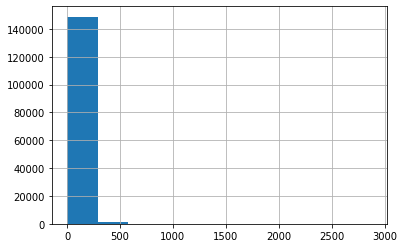

In [16]:
df['units_sold'].hist()

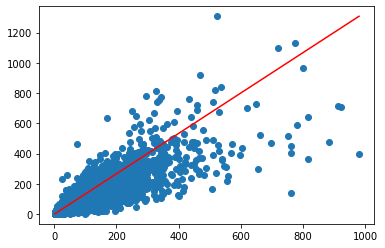

In [17]:
plt.scatter(y_pred,Y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()), np.linspace(Y_test.min(),Y_test.max()),color="red")

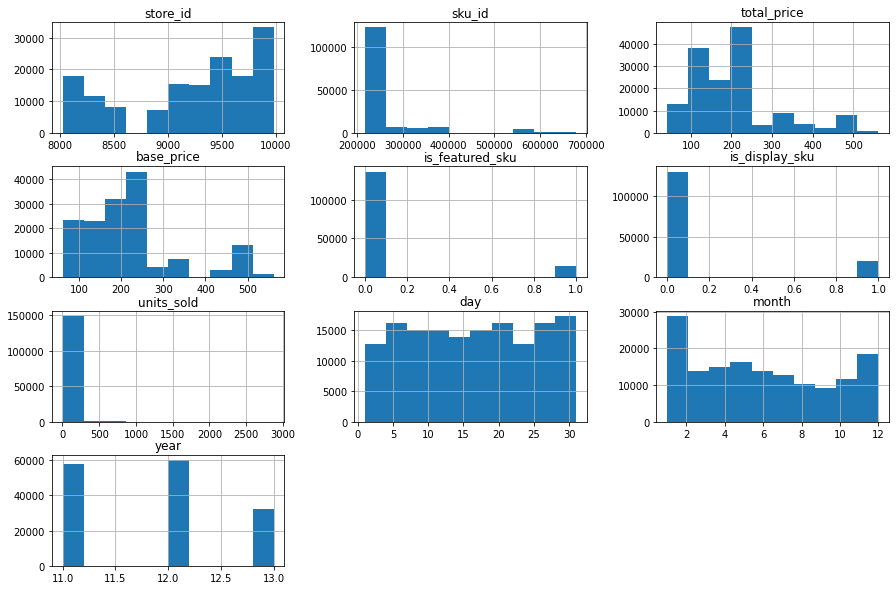

In [18]:
df.hist(figsize=(15,10))
plt.show()

In [19]:
len(df.store_id.unique())

76

In [20]:
len(df.sku_id.unique())

28

In [21]:
df.units_sold.describe()

count    150149.000000
mean         51.674543
std          60.207962
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

In [22]:
df=df[df.units_sold < df.units_sold.quantile(0.99)]

<Axes: >

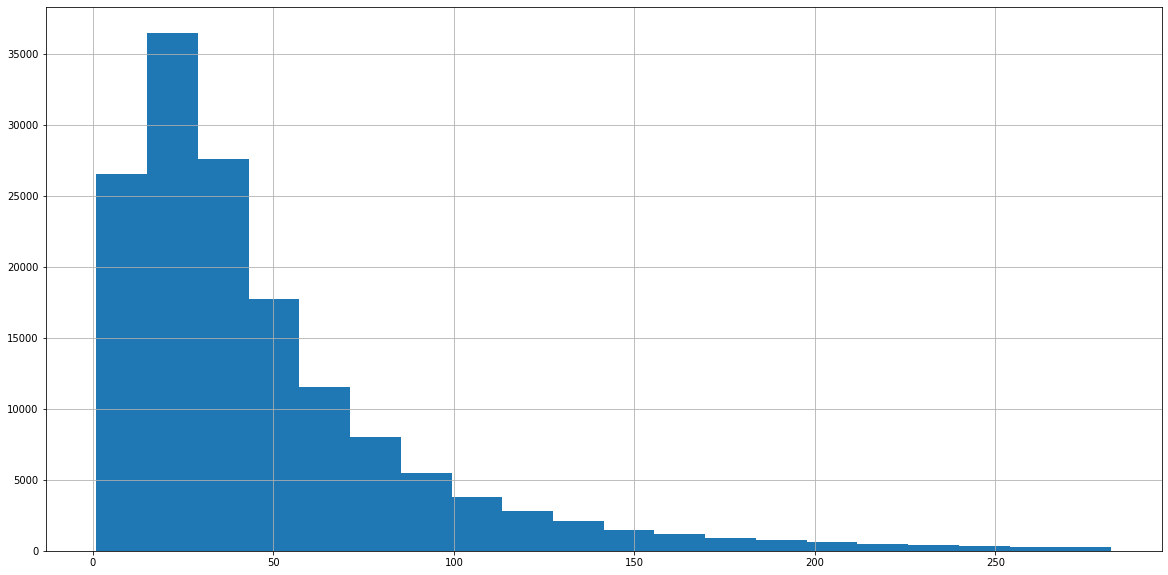

In [23]:
df.units_sold.hist(figsize=(20,10),bins=20)

In [24]:
df_new=df.join(pd.get_dummies(df.store_id,prefix='store')).drop('store_id',axis=1)
df_new=df_new.join(pd.get_dummies(df.sku_id,prefix='item')).drop('sku_id',axis=1)

In [25]:
df_new

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,item_320485,item_327492,item_378934,item_398721,item_545621,item_546789,item_547934,item_600934,item_673209,item_679023
0,99.0375,111.8625,0,0,20,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,1,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,9,7,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,9,7,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,9,7,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,9,7,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [26]:
model=RandomForestRegressor(n_jobs=-1)
x,y=df_new.drop('units_sold',axis=1),df_new['units_sold']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [28]:
model.score(x_test,y_test)

0.8271724371458188

In [29]:
y_pred=model.predict(x_test)
#rmse = root_mean_squared_error(y_pred, Y_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 17.771799543102986


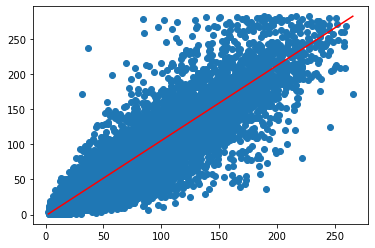

In [31]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()), np.linspace(y_test.min(),y_test.max()),color="red")

### Hyper-parameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'n_estimators':[10,20],
    'min_samples_split':[2,3]
}
model=RandomForestRegressor(n_jobs=-1)
grid_search=GridSearchCV(model,param_grid,verbose=2,cv=3)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  24.3s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  21.1s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=  22.8s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  32.2s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  21.3s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=  23.6s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  12.2s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  11.1s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=  11.1s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  20.0s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=  19.7s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [38]:
best_model=grid_search.best_estimator_

In [39]:
grid_search.best_params_

{'min_samples_split': 3, 'n_estimators': 20}

In [40]:
best_model.score(x_test,y_test) 

0.8220325372509928